In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.fft 
import pmdarima as pm
import itertools

os.chdir('/home/etienne/data/spikes')
spikes3=pd.read_csv('spikesrat3.csv')

In [2]:
import cv2
def window(spikes,delta):
    '''
    Entry: number of spikes per hour
           delta which is the number of time points chosen to average
           
    Return: the unweighted downsampled temporal network of new size (time points)/delta
    '''
    Filter=np.ones((delta,))

    m=np.convolve(spikes,Filter,mode='valid')[::delta]
    return(m)

In [3]:
spikes=np.array(spikes3)[:,0]
delta=24

Filter=np.ones((delta,))/delta

spikespd=window(spikes,delta)

In [87]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from random import random
from pmdarima.arima import auto_arima

# contrived dataset

n=19

signal=spikespd[10:len(spikespd)-n]
trend=np.gradient(signal)[:-1]
trendb=signal[1:]-signal[:-1]
# fit model

model = SARIMAX(trend,order=(4,0,0),seasonal_order=(5,1,0,6))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(0,len(signal)+n-1)


arima_model = auto_arima(trend,start_P=2).fit(trend)
y=arima_model.predict(n)

/home/etienne/env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/home/etienne/env/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


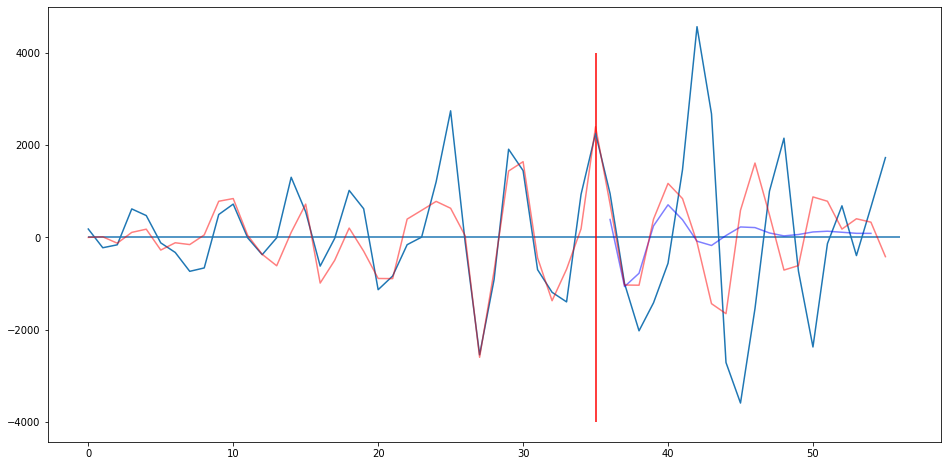

In [88]:
plt.figure(figsize=(16,8))

toplot=np.gradient(spikespd[10:])
#plt.plot(trend)
plt.plot(toplot)
plt.hlines(0,0,56)
plt.vlines(56-n-2,-4000,4000,color='r')
plt.plot(np.arange(len(spikespd)-n,len(spikespd))-11,y,color=(0,0,1,0.5))
plt.plot(np.arange(len(yhat)),yhat,color=(1,0,0,0.5))

<BarContainer object of 56 artists>

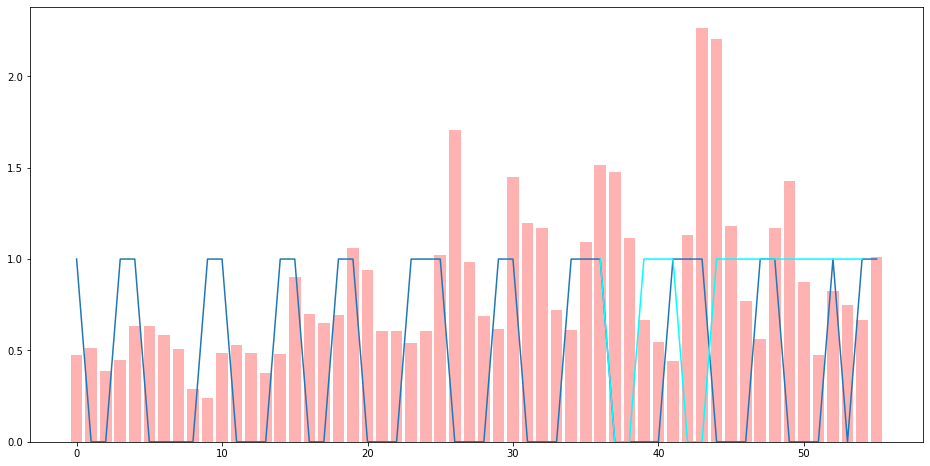

In [89]:
signalt=spikespd[10:]
trend=np.gradient(signalt)
trendb=signalt[1:]-signalt[:-1]

plt.figure(figsize=(16,8))
plt.plot(trend>=0)
plt.plot(np.arange(len(y))+len(spikespd)-n-11,y>0,color=(0,1,1,1))
plt.bar(np.arange(len(signalt)),signalt/5000,color=(1,0,0,0.3))